In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Necessary Packages**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

**Loading and Understanding Data**

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/household_power_consumption.csv")

In [ ]:
dataset.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0,1,17.0
1,16/12/2006,17:25:00,5.36,0.436,233.63,23,0,1,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23,0,2,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23,0,1,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0,1,17.0


In [ ]:
dataset.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1048570,13/12/2008,21:34:00,0.426,0.076,242.27,1.8,0,0,0.0
1048571,13/12/2008,21:35:00,0.424,0.076,242.1,1.8,0,0,0.0
1048572,13/12/2008,21:36:00,0.422,0.076,241.73,1.8,0,0,0.0
1048573,13/12/2008,21:37:00,0.422,0.078,242.56,1.8,0,0,0.0
1048574,13/12/2008,21:38:00,0.422,0.078,242.61,1.8,0,0,0.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Date                   1048575 non-null  object 
 1   Time                   1048575 non-null  object 
 2   Global_active_power    1048575 non-null  object 
 3   Global_reactive_power  1048575 non-null  object 
 4   Voltage                1048575 non-null  object 
 5   Global_intensity       1048575 non-null  object 
 6   Sub_metering_1         1048575 non-null  object 
 7   Sub_metering_2         1048575 non-null  object 
 8   Sub_metering_3         1044506 non-null  float64
dtypes: float64(1), object(8)
memory usage: 72.0+ MB


**Data Cleaning**

In [ ]:
dataset.isnull().sum()

Date                        0
Time                        0
Global_active_power         0
Global_reactive_power       0
Voltage                     0
Global_intensity            0
Sub_metering_1              0
Sub_metering_2              0
Sub_metering_3           4069
dtype: int64

In [ ]:
dataset.loc[dataset.Sub_metering_3.isnull()].head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,?,?,?,?,?,?,NaN
6840,21/12/2006,11:24:00,?,?,?,?,?,?,NaN
19724,30/12/2006,10:08:00,?,?,?,?,?,?,NaN
19725,30/12/2006,10:09:00,?,?,?,?,?,?,NaN
41832,14/1/2007,18:36:00,?,?,?,?,?,?,NaN


In [ ]:
dataset.replace('?', np.nan, inplace=True)
dataset.loc[dataset.Sub_metering_3.isnull()].head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6840,21/12/2006,11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19724,30/12/2006,10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19725,30/12/2006,10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41832,14/1/2007,18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataset = dataset.dropna()
for i in dataset.columns[2:] :
  dataset[i] = dataset[i].astype('float64')
# dataset.isnull().sum().sum()

<ipython-input-13-26a2fabcf8e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[i] = dataset[i].astype('float64')


In [ ]:
dataset.shape
dataset.isnull().sum().sum()

0

In [ ]:
values = dataset.values
dataset['Sub_metering_4'] = (values[:,2] * 1000 / 60) - (values[:,6] + values[:,7] + values[:,8])
dataset['Sub_metering_4'] = dataset['Sub_metering_4'].astype('float64')

In [ ]:
dataset.dtypes

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
Sub_metering_4           float64
dtype: object

In [ ]:
dataset

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000
...,...,...,...,...,...,...,...,...,...,...
1048570,13/12/2008,21:34:00,0.426,0.076,242.27,1.8,0.0,0.0,0.0,7.100000
1048571,13/12/2008,21:35:00,0.424,0.076,242.10,1.8,0.0,0.0,0.0,7.066667
1048572,13/12/2008,21:36:00,0.422,0.076,241.73,1.8,0.0,0.0,0.0,7.033333
1048573,13/12/2008,21:37:00,0.422,0.078,242.56,1.8,0.0,0.0,0.0,7.033333


In [ ]:
dataset.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
count,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06
mean,1.108202e+00,1.182732e-01,2.399598e+02,4.718123e+00,1.177451e+00,1.475177e+00,5.933837e+00,9.883571e+00
std,1.129546e+00,1.095062e-01,3.284504e+00,4.763588e+00,6.321183e+00,6.352703e+00,8.210398e+00,1.072921e+01
min,7.600000e-02,0.000000e+00,2.234900e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.400000e+00
25%,2.880000e-01,0.000000e+00,2.379700e+02,1.200000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.733333e+00
50%,5.500000e-01,9.800000e-02,2.402100e+02,2.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.500000e+00
75%,1.544000e+00,1.860000e-01,2.421400e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.086667e+01
max,1.067000e+01,1.390000e+00,2.521400e+02,4.640000e+01,8.000000e+01,7.800000e+01,3.100000e+01,1.248333e+02


**Exploratory Data Analysis**

In [ ]:
numeric_df = dataset.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                       Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.254841 -0.400987   
Global_reactive_power             0.254841               1.000000 -0.120617   
Voltage                          -0.400987              -0.120617  1.000000   
Global_intensity                  0.999020               0.271843 -0.411298   
Sub_metering_1                    0.474129               0.137682 -0.203805   
Sub_metering_2                    0.456677               0.150528 -0.178899   
Sub_metering_3                    0.624107               0.076274 -0.284932   
Sub_metering_4                    0.727305               0.218541 -0.259544   

                       Global_intensity  Sub_metering_1  Sub_metering_2  \
Global_active_power            0.999020        0.474129        0.456677   
Global_reactive_power          0.271843        0.137682        0.150528   
Voltage                       -0.411298       -0.203805       -

<ipython-input-24-3e567e313c16>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Global_active_power'])


<Axes: xlabel='Global_active_power', ylabel='Density'>

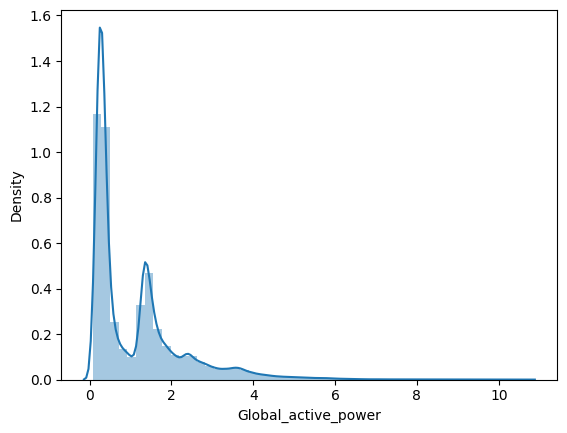

In [ ]:
sns.distplot(dataset['Global_active_power'])

<ipython-input-25-fc9da9e0cd09>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Global_reactive_power'], kde=False, bins=30)


<Axes: xlabel='Global_reactive_power'>

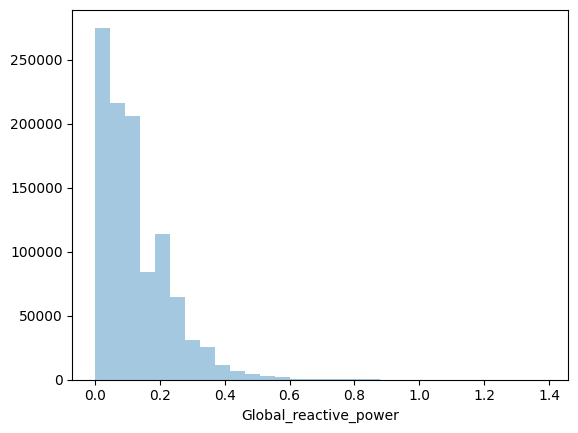

In [ ]:
sns.distplot(dataset['Global_reactive_power'], kde=False, bins=30)

<ipython-input-26-369bcf2bd0cb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Global_active_power'], kde=False, bins=30)


<Axes: xlabel='Global_active_power'>

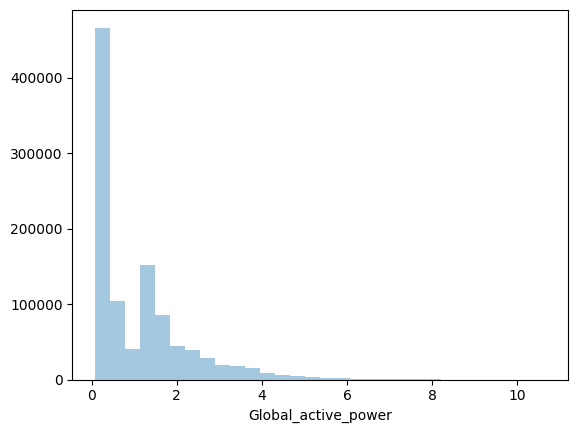

In [ ]:
sns.distplot(dataset['Global_active_power'], kde=False, bins=30)

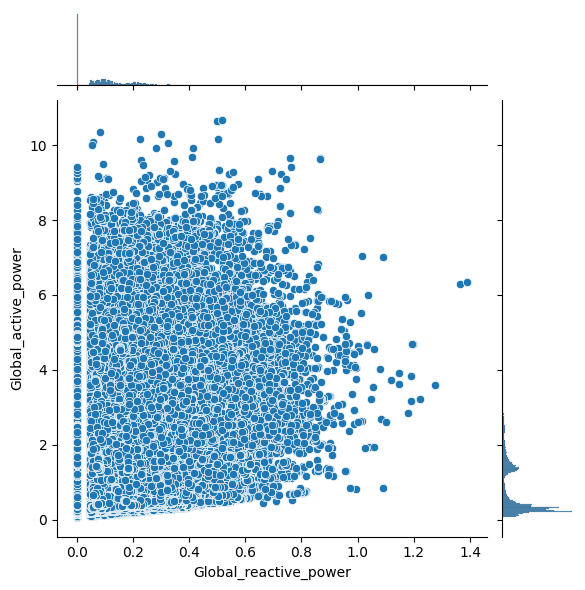

In [ ]:
sns.jointplot( x='Global_reactive_power', y='Global_active_power', data=dataset, kind='scatter' )

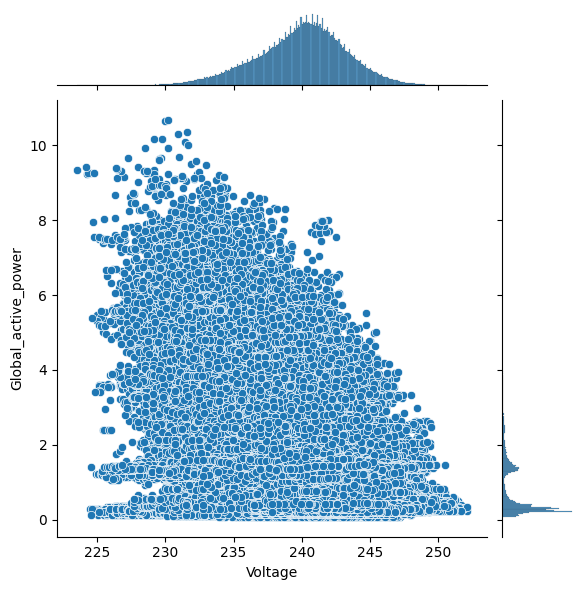

In [ ]:
sns.jointplot( x='Voltage', y='Global_active_power', data=dataset, kind='scatter' )

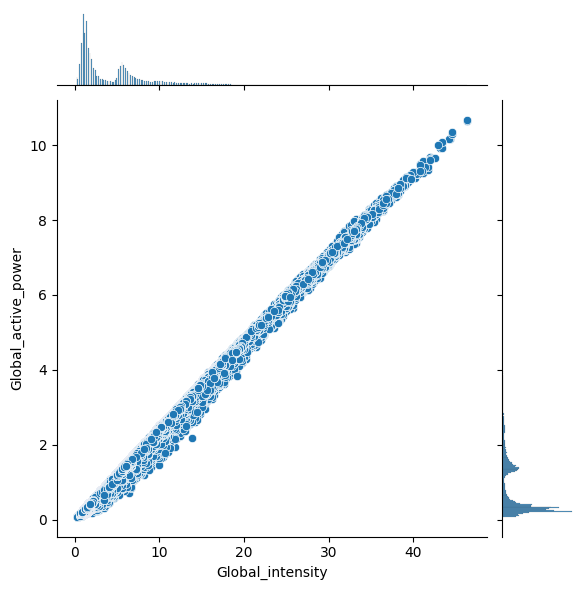

In [ ]:
sns.jointplot( x='Global_intensity', y='Global_active_power', data=dataset, kind='scatter' )

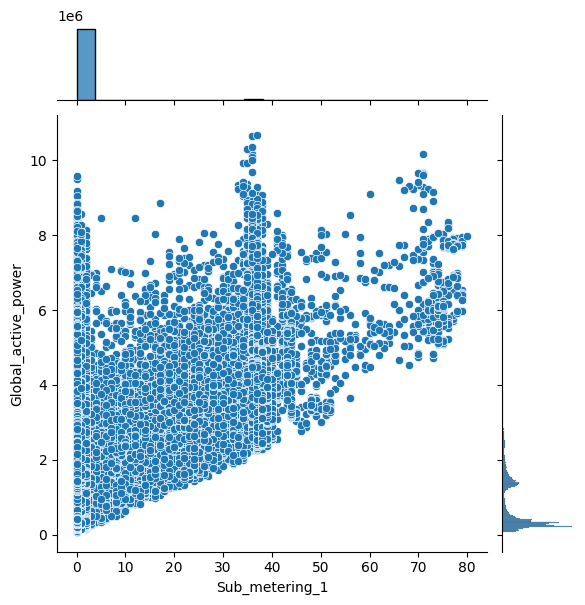

In [ ]:
sns.jointplot( x='Sub_metering_1', y='Global_active_power', data=dataset, kind='scatter' )

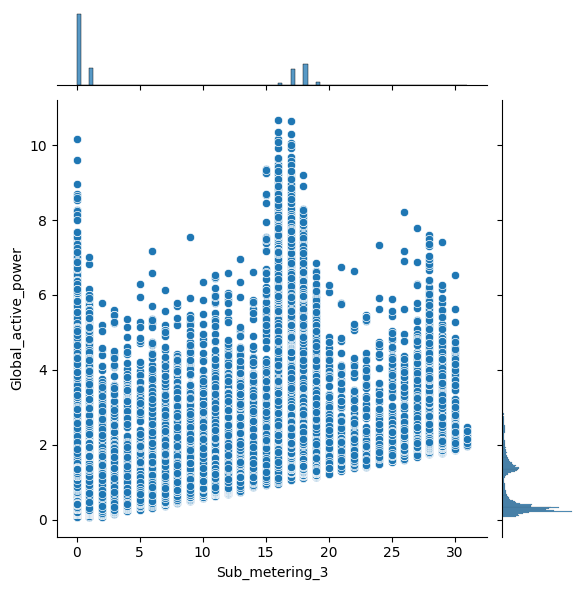

In [ ]:
sns.jointplot( x='Sub_metering_3', y='Global_active_power', data=dataset, kind='scatter' )

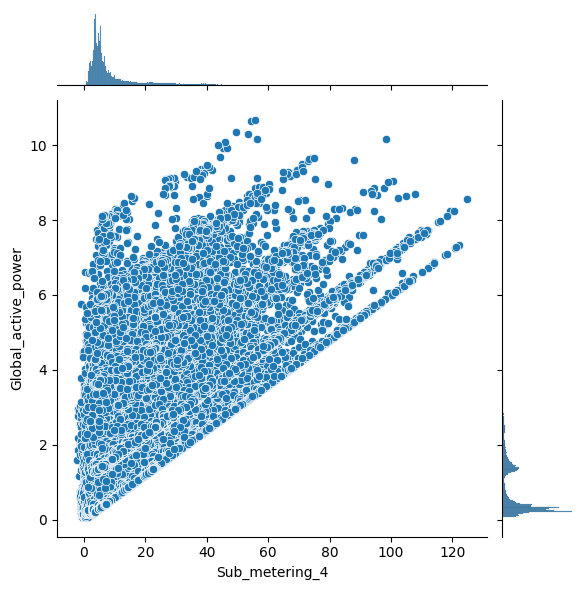

In [ ]:
sns.jointplot( x='Sub_metering_4', y='Global_active_power', data=dataset, kind='scatter' )

<Axes: >

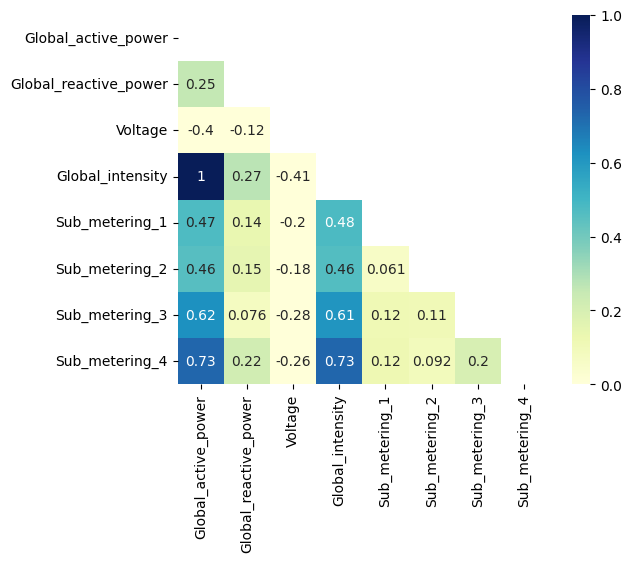

In [ ]:
pearson = numeric_df.corr(method='pearson')
mask = np.zeros_like(pearson)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(pearson, vmax=1, vmin=0, square=True, cbar=True, annot=True, cmap='YlGnBu', mask=mask)

In [ ]:
X = dataset.iloc[:,[3,5,6,7,8]]
y = dataset.iloc[:,2]

In [ ]:
X.head()

,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0.418,18.4,0.0,1.0,17.0
1,0.436,23.0,0.0,1.0,16.0
2,0.498,23.0,0.0,2.0,17.0
3,0.502,23.0,0.0,1.0,17.0
4,0.528,15.8,0.0,1.0,17.0


In [ ]:
y.head()

0    4.216
1    5.360
2    5.374
3    5.388
4    3.666
Name: Global_active_power, dtype: float64

**Splitting Dataset for Training and Testing**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(731154, 5)
(313352, 5)
(731154,)
(313352,)


**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
predict = lm.predict(X_test)

In [ ]:
predict

array([0.2694776 , 2.03815702, 3.87697321, ..., 1.25685391, 0.32133373,
       0.57035839])

**XGBoost**

In [ ]:
from xgboost import XGBRegressor
model2=XGBRegressor()
model2.fit(X_train,y_train)
y_predict2 = model2.predict(X_test)

In [ ]:
y_predict2

array([0.289304  , 2.0481803 , 3.916626  , ..., 1.2715183 , 0.33365792,
       0.5663677 ], dtype=float32)

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor()
model1.fit(X_train,y_train)
y_predict1 = model1.predict(X_test)

In [ ]:
y_predict1

array([0.29342782, 2.03378   , 3.93854333, ..., 1.2654107 , 0.32908286,
       0.55104902])

**Ridge**

In [ ]:
from sklearn.linear_model import Ridge
model3 = Ridge()
model3.fit(X_train,y_train)
y_predict3 = model3.predict(X_test)

In [ ]:
y_predict3

array([0.26947753, 2.03815718, 3.87697829, ..., 1.25685329, 0.32133298,
       0.57036177])

In [ ]:
y_p1 = lm.predict([[0.418,18.4,0.0,1.0,17.0]])
y_p1

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.31369694])

**Linear Regression Model Evaluation**

In [ ]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('RSquarevalue:',metrics.r2_score(y_test,predictions))

MAE: 0.028050060002445348
MSE: 0.0018729966075640063
RMSE: 0.043278130823361655
RSquarevalue: 0.9985308611177377


**XGBRegressor Model Evaluation**

In [ ]:
from sklearn import metrics
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_predict2))
print('MSE:',metrics.mean_squared_error(y_test, y_predict2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_predict2)))
print('RSquarevalue:',metrics.r2_score(y_test,y_predict2))

MAE: 0.02081452095233143
MSE: 0.0011727744842479778
RMSE: 0.034245795132365926
RSquarevalue: 0.9990801005255558


**Random Forest Model Evaluation**

In [ ]:
from sklearn import metrics
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_predict1))
print('MSE:',metrics.mean_squared_error(y_test, y_predict1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_predict1)))
print('RSquarevalue:',metrics.r2_score(y_test,y_predict1))

MAE: 0.021204698447612153
MSE: 0.0013173187677924653
RMSE: 0.03629488624851255
RSquarevalue: 0.9989667230499606


**Ridge Forest Model Evaluation**

In [ ]:
from sklearn import metrics
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_predict3))
print('MSE:',metrics.mean_squared_error(y_test, y_predict3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_predict3)))
print('RSquarevalue:',metrics.r2_score(y_test,y_predict3))

MAE: 0.028050108459261175
MSE: 0.001872996912176212
RMSE: 0.04327813434260091
RSquarevalue: 0.9985308608788063


In [ ]:
from sklearn.model_selection import cross_val_score
crxVal = cross_val_score(lm,X,y,cv=5)

In [ ]:
np.mean(crxVal)

0.9983821622023541